GIST Plots of initial quick and dirty run for one interval

Assumes Compute has completed

Plots:
- Well selection
  - r minus T plot
  - map (zoomed out)
  - map (zoomed in, larger wells)
- Tables:
  - selected wells
  - unselected wells
  - out-of-zone wells
- Contributions
  - Histograms of pressures for scenarios
  - Histograms of numbers of wells contributing
  - Strip plot of contributions
- Time series
  - Disposal history of marginally contributing wells
  - Disposal history of wells considered but minimally contributing
  - Pressure histories
    - Total for each realization vs time - plot EQ timing
    - All realizations for one well - superimpose injection rates

- Comparisons of scenarios
  - compare histograms of results
  - shallow vs. deep time series vs. seismicity

Next Steps:
- Edit / update injection data
- Update subsurface information
- Choose scenarios
- Input future injection
- Replot time series

In [0]:
%run "/Workspace/_utils/Utility_Functions"

In [0]:
!pip install geopandas
!pip install geodatasets
!pip install folium matplotlib mapclassify contextily

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import sys
basePath='/Workspace/Users/bill.curry@exxonmobil.com'
gistPath='/Workspace/Users/bill.curry@exxonmobil.com/GIST/lib'
sys.path.append(basePath)
sys.path.append(gistPath)

In [0]:
import numpy as np
import pandas as pd
import os
import gistMC as gi
import eqSQL as es
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import contextily as cx
import gistPlots as gp

In [0]:
eventID='texnet2024shcj'
runPath=basePath+'/GIST/runs/NorthTarzan/Outputs/'+eventID+'/'
prefix=runPath+'NorthTarzan_09-24_'
dPPWellDF=pd.read_csv(prefix+'DeepPPWells.csv')
dPPInjDF=pd.read_csv(prefix+'DeepPPInj.csv')
dPEWellDF=pd.read_csv(prefix+'DeepPEWells.csv')
sPPWellDF=pd.read_csv(prefix+'ShallowPPWells.csv')
sPPInjDF=pd.read_csv(prefix+'ShallowPPInj.csv')
sPEWellDF=pd.read_csv(prefix+'ShallowPEWells.csv')
EQDF=pd.read_csv(runPath+'EQ.csv')
EQDF=geopandas.GeoDataFrame(EQDF, geometry=geopandas.points_from_xy(EQDF['Longitude'],EQDF['Latitude']), crs="EPSG:4326")

# Read deep and shallow realizations:
deepRealizations=pd.read_csv(runPath+'deepRealizations.csv')
shallowRealizations=pd.read_csv(runPath+'shallowRealizations.csv')

deepWellsDF=pd.read_csv(runPath+'/NorthTarzan_09-24_DeepPPWells.csv')
deepRTDF=pd.read_csv(runPath+'/NorthTarzan_09-24_DeepRTDF.csv')
shallowWellsDF=pd.read_csv(runPath+'/NorthTarzan_09-24_ShallowPPWells.csv')
shallowRTDF=pd.read_csv(runPath+'/NorthTarzan_09-24_ShallowRTDF.csv')

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


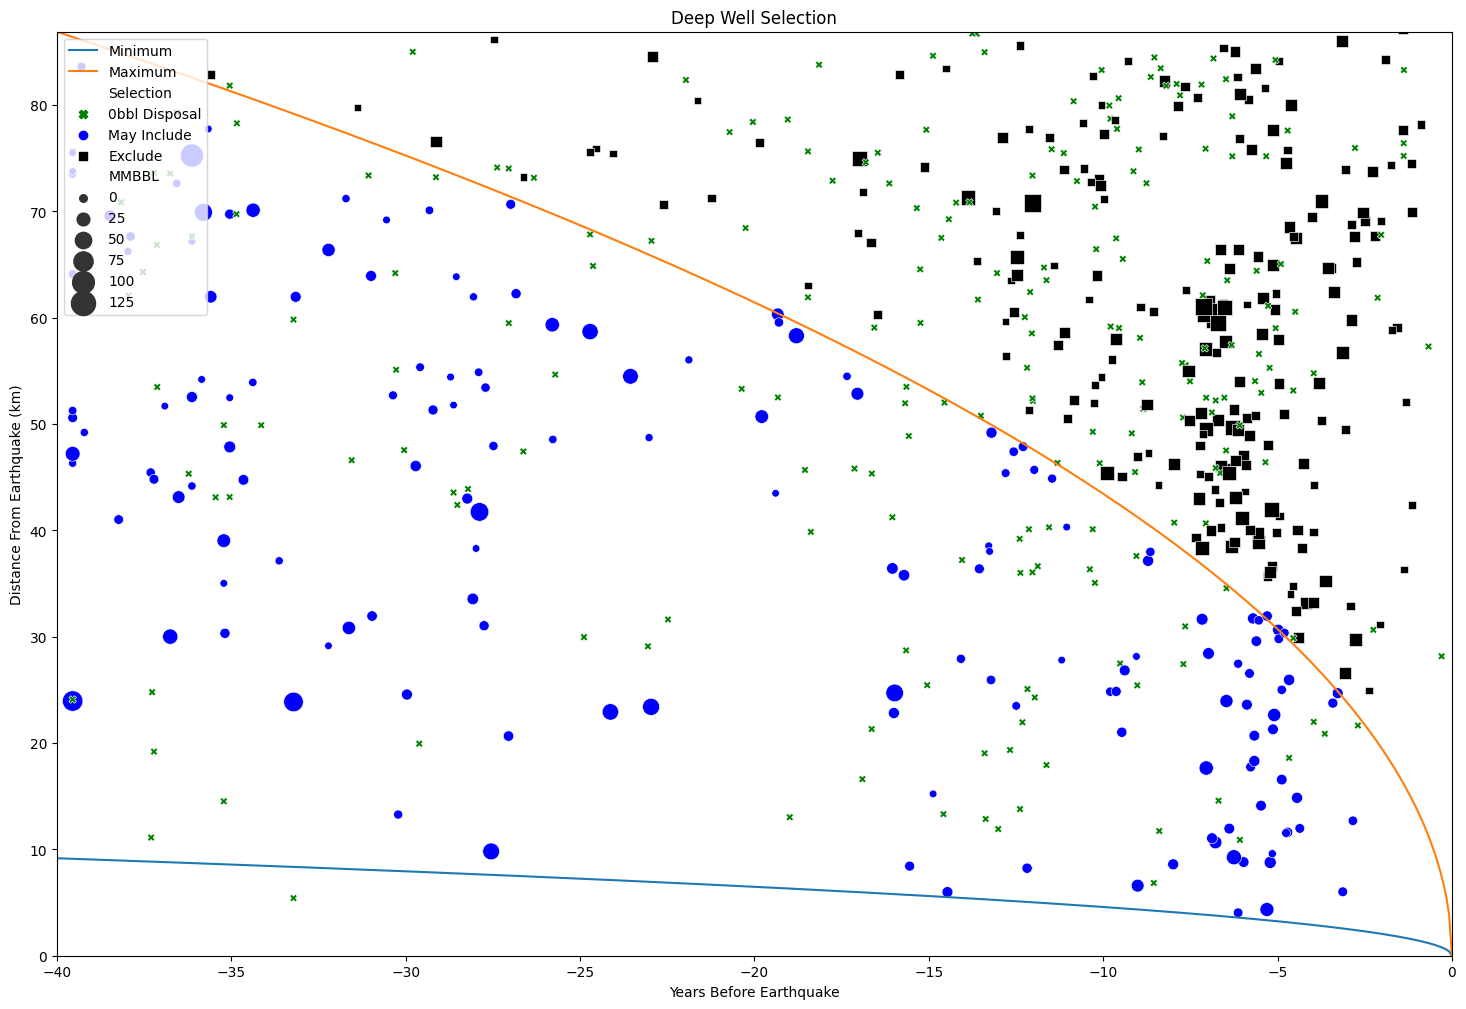

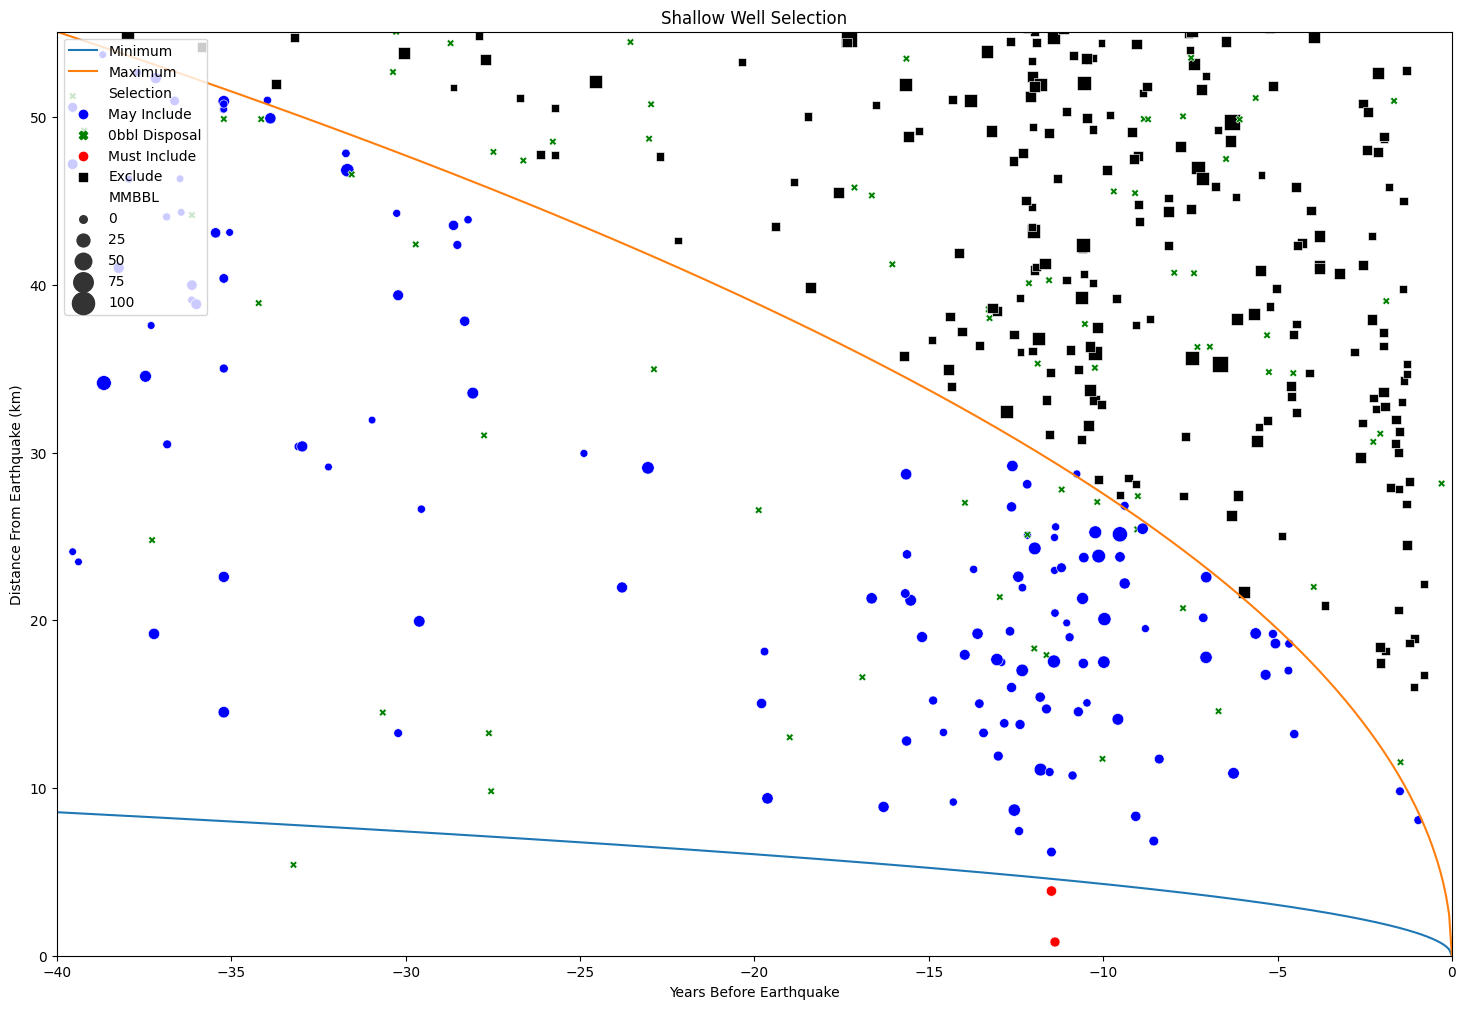

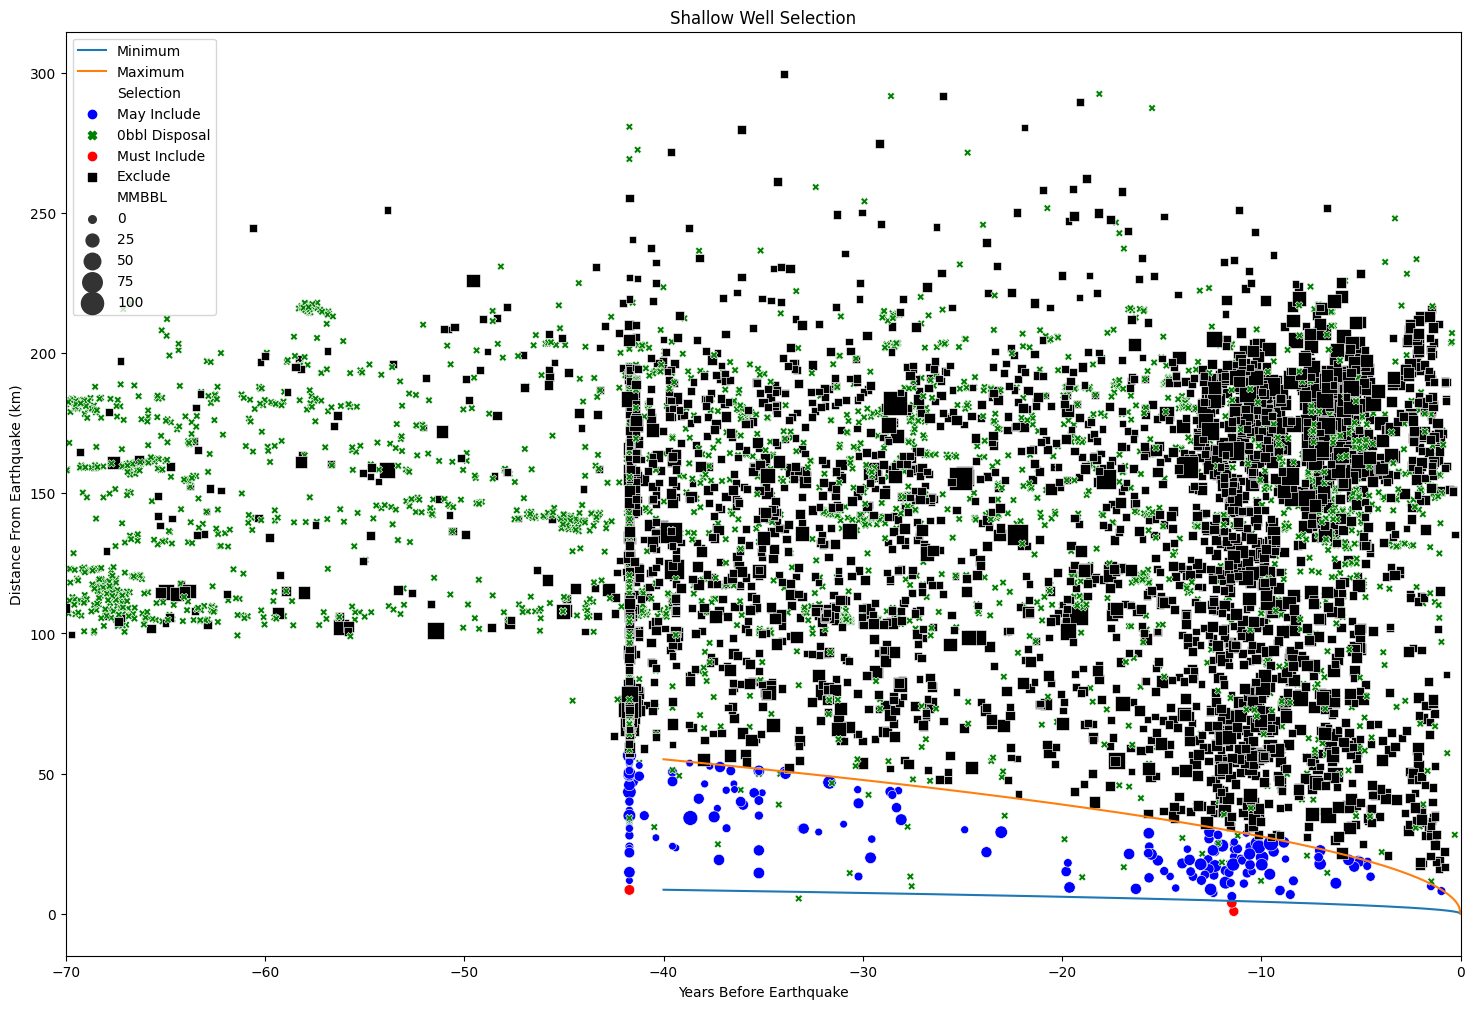

In [0]:
# This should have maximum and minimum diffusivities to put - bound what the selection could be
gp.rMinusTPlotPP(deepWellsDF,deepRTDF,minYear=-40,sizeTuple=(30,300),title='Deep Well Selection',zoom=True)
gp.rMinusTPlotPP(shallowWellsDF,shallowRTDF,minYear=-40,sizeTuple=(30,300),title='Shallow Well Selection',zoom=True)
gp.rMinusTPlotPP(shallowWellsDF,shallowRTDF,minYear=-70,sizeTuple=(30,300),title='Shallow Well Selection',zoom=False)

In [0]:
print(EQDF['EventID'])

0    texnet2024shcj
Name: EventID, dtype: object


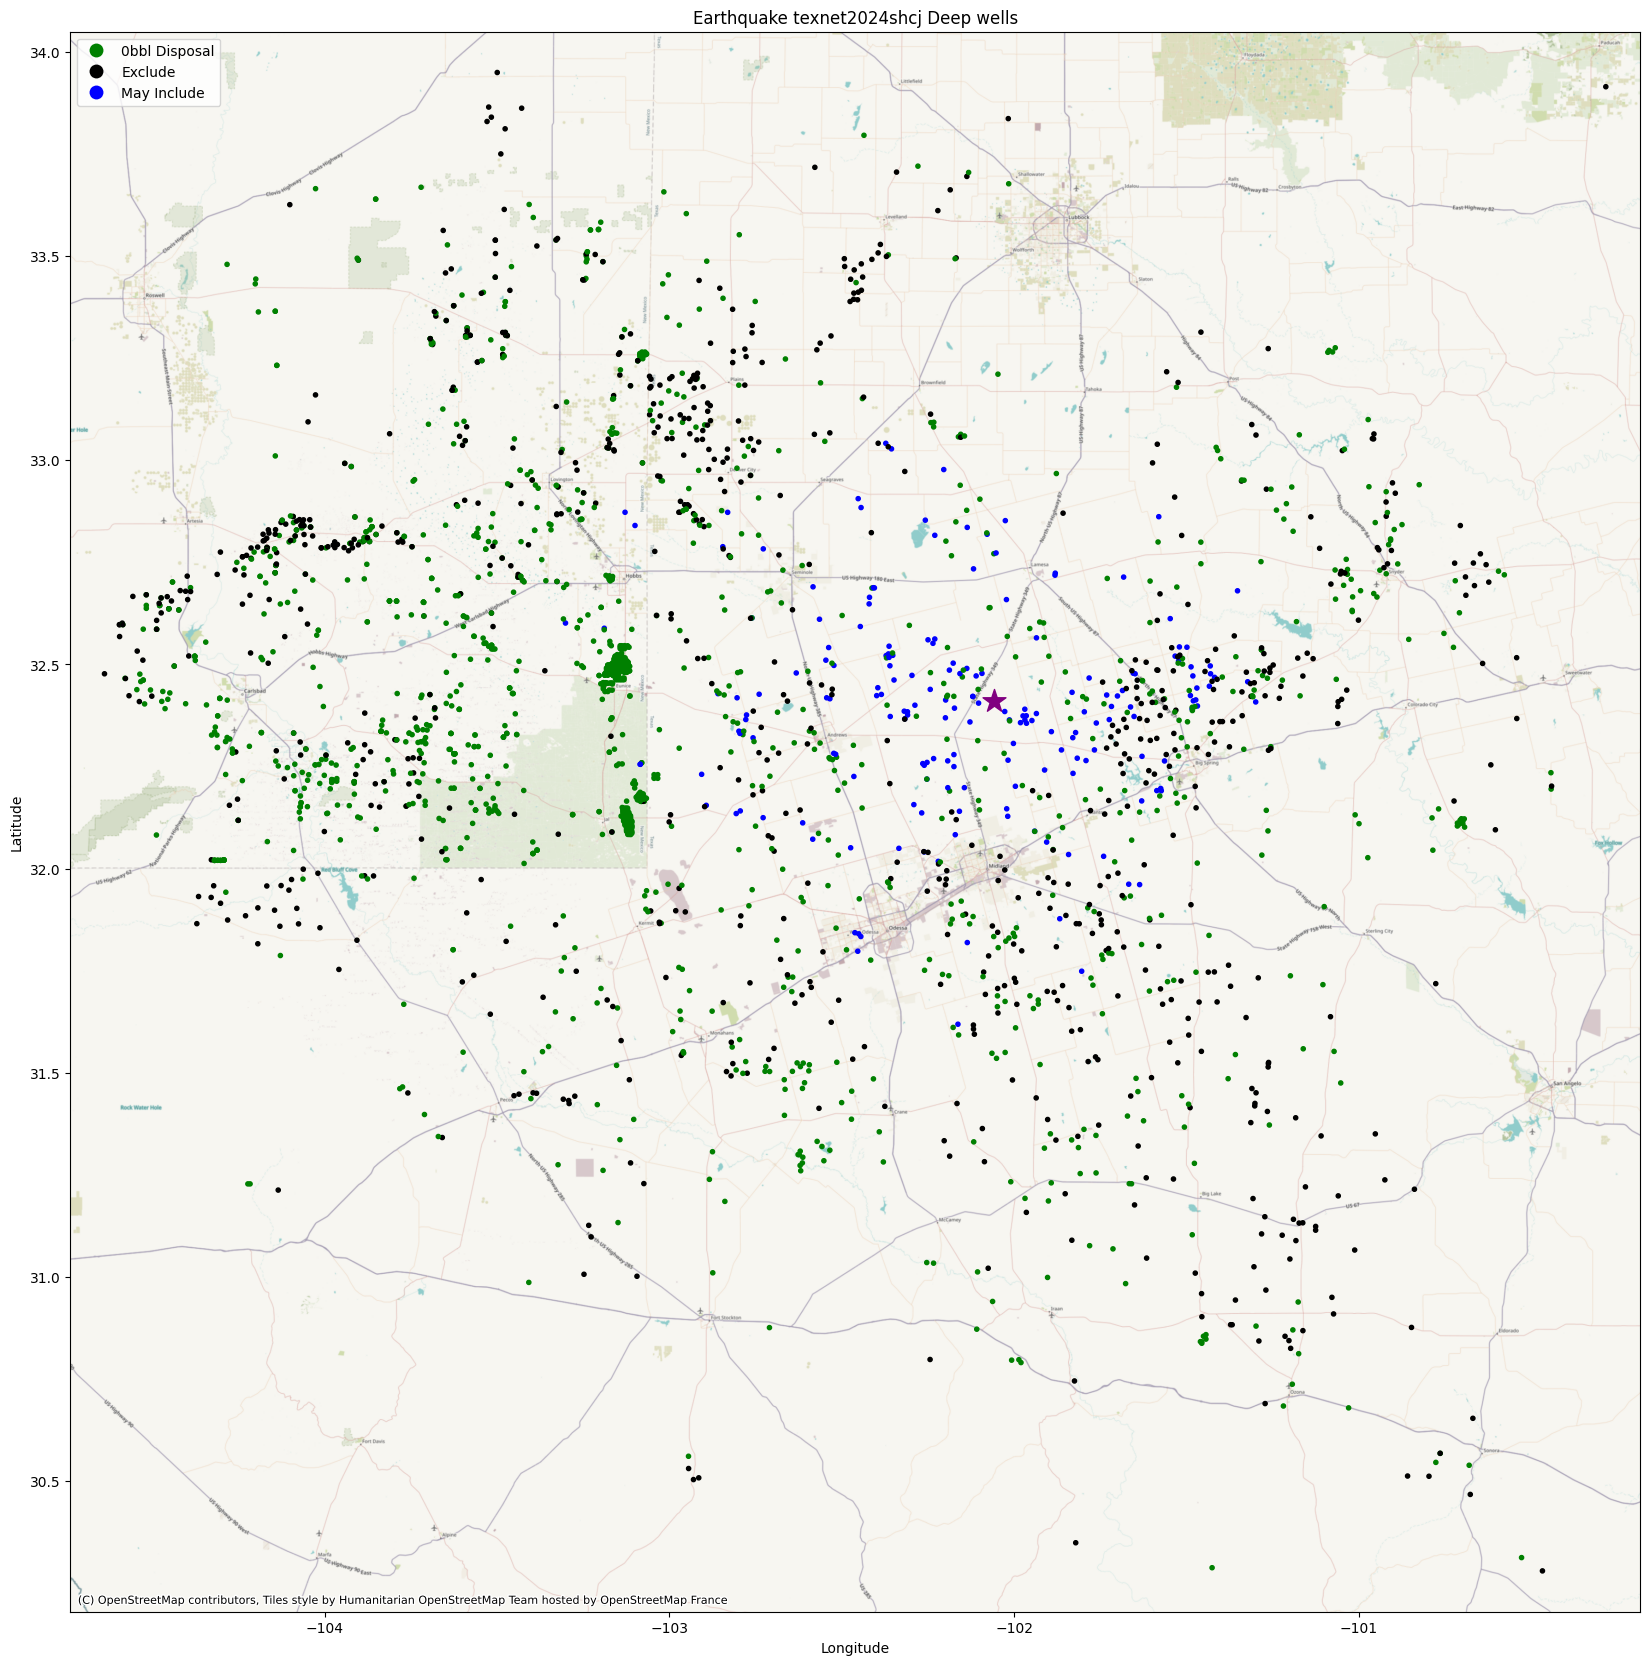

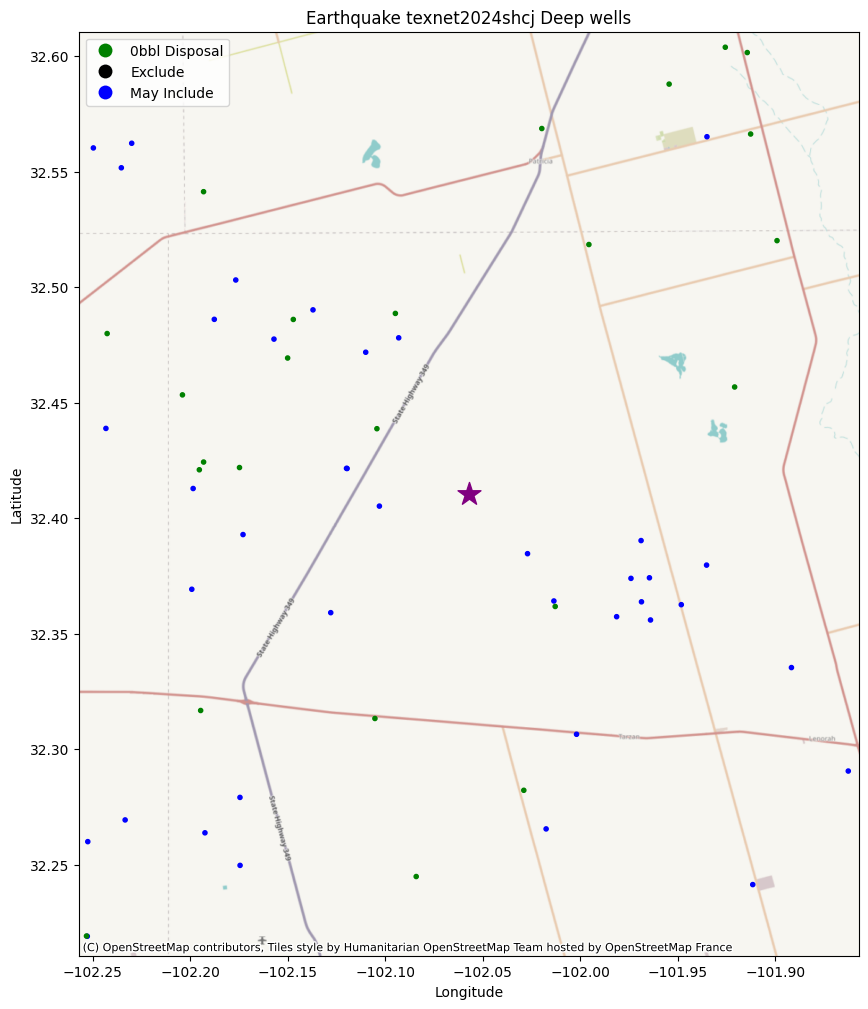

In [0]:
gp.intervalWellMapPP(EQDF,'Deep',deepWellsDF)
gp.intervalWellMapPP(EQDF,'Deep',deepWellsDF,zoom=0.2)

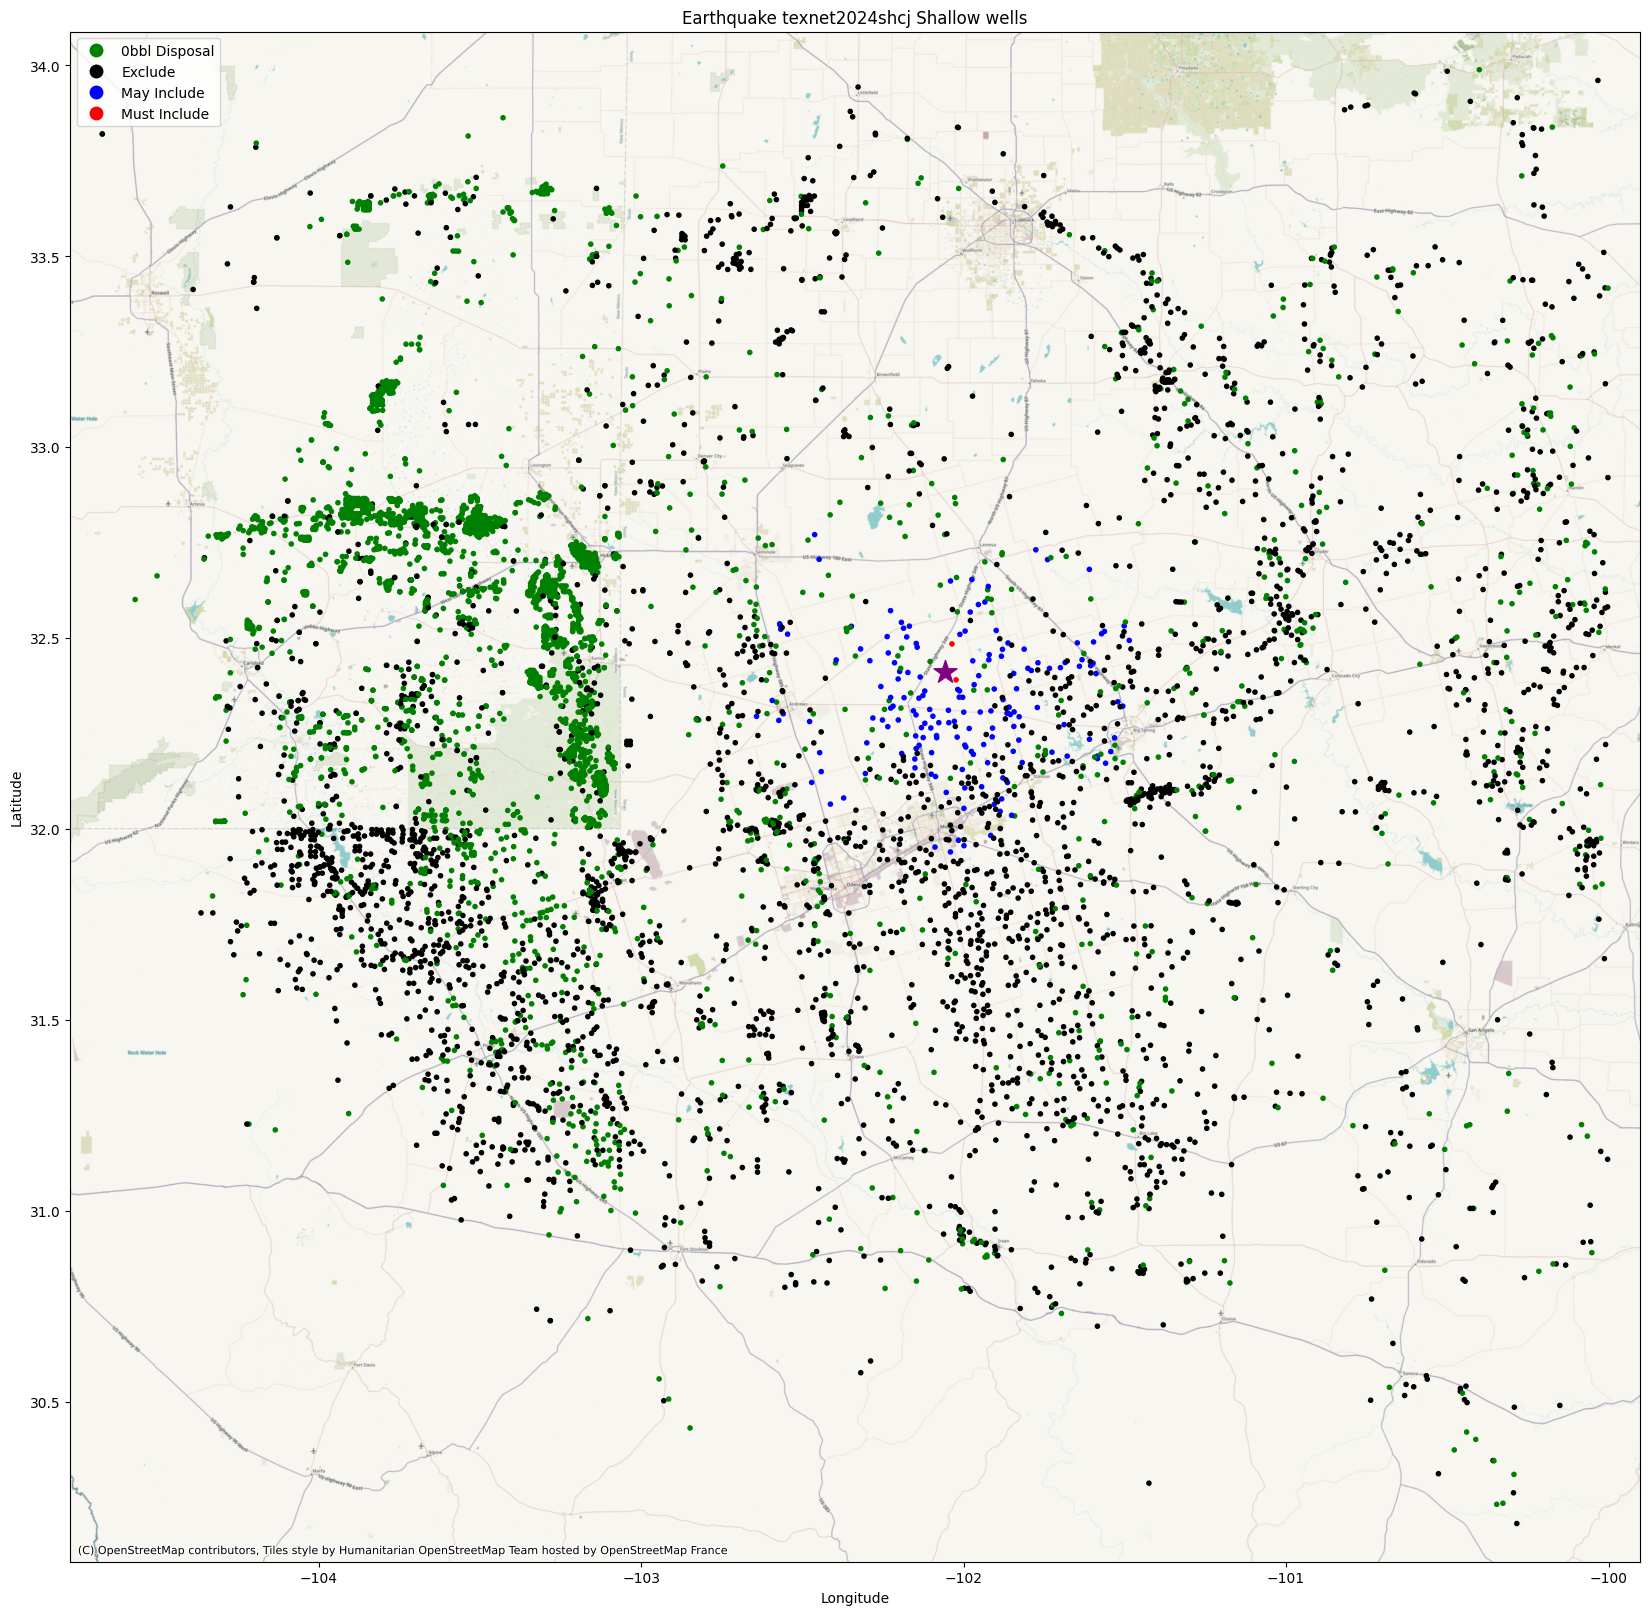

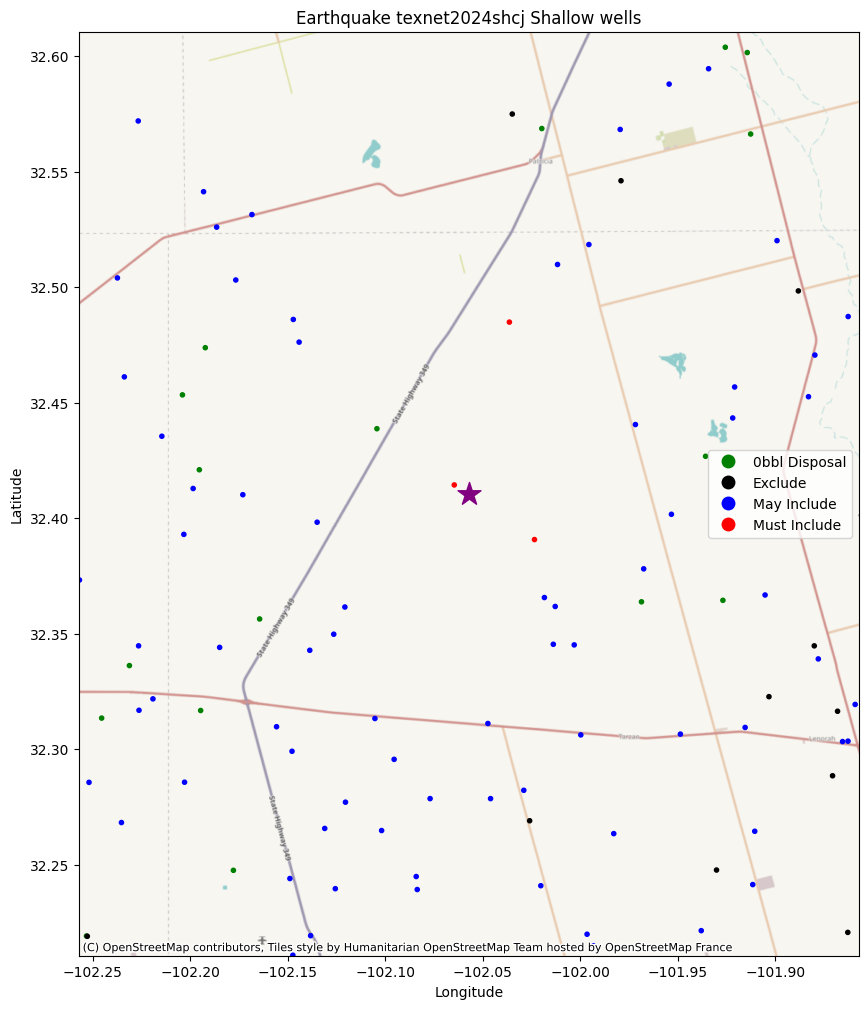

In [0]:
gp.intervalWellMapPP(EQDF,'Shallow',shallowWellsDF)
gp.intervalWellMapPP(EQDF,'Shallow',shallowWellsDF,zoom=0.2)

In [0]:
# Load results from run

dPPDF=pd.read_csv(runPath+'deepPP.csv')
smallDPPDF=pd.read_csv(runPath+'/NorthTarzan_09-24_deepPPSubset.csv')
smallDWellList=pd.read_csv(runPath+'/NorthTarzan_09-24_deepWellOrder.csv')['Name'].to_list()
print(smallDWellList)

['CORSICA SWD 1', 'JONES-HOLTON D 4D', 'PAT, K. 3', 'POE  D 2', 'JONES-HOLTON D 5D', 'BREEDLOVE URSA 1', 'CAPRI SWD 1', 'GT HALL D  1', 'BREEDLOVE URSA 2D', 'HECKER 1D', 'BREEDLOVE, F. D., -B- 49', 'STATE UNIVERSITY HUTEX CONS. 22W', 'HECKER 2D', 'STATE UNIVERSITY HUTEX CONS. 24', 'BREEDLOVE, F. D., -B- 47', 'CHILTON 7', 'BROWN SWD 1', 'HUTEX S W D SYSTEM G 12', 'THOMPSON 3', 'UNIVERSITY 7-27 D  2', 'STATE UNIVERSITY HUTEX CONS. 19', 'HECKER D  2', 'UNIVERSITY 7-31B D  1', 'BIG SIPPER 1D', 'BIG GULP 1D', 'TOUCAN SWD 11R', 'UNIVERSITY 5-3 1D', 'HERDING CATS 1D', 'SUNFLOWER SWD 1', 'U-TEXAS #36994-A/C #2 1D', 'MABEE 5 SWD 1', 'MABEE 240 1SW', 'UNIVERSITY -B- 2', 'CHILTON, J. P. 1 D', 'MCMORRIES 18 SWD 2D', 'TEXAS UNIV. -CC- 26W', 'AMROW SWD 2', 'CORFU SWD 1', 'PEELER D  1', 'MCDOUGAL, F. P. 1', 'BUTLER 4', 'QUEEN BEE SWD 1', 'MABEE 239 1SW', 'MABEE 6 SWD 1', 'PARKER, J. E. -M- 1D', 'HOLCOMB 68 SWD 1', 'LONE RANGER SWD 1', 'GILBERT, G. WRIGHT. JR. ESTATE 1', 'MABEE SOUTH SWD 2', 'TEXAS UN

 disaggregationPlotPP: figure height is  12.75


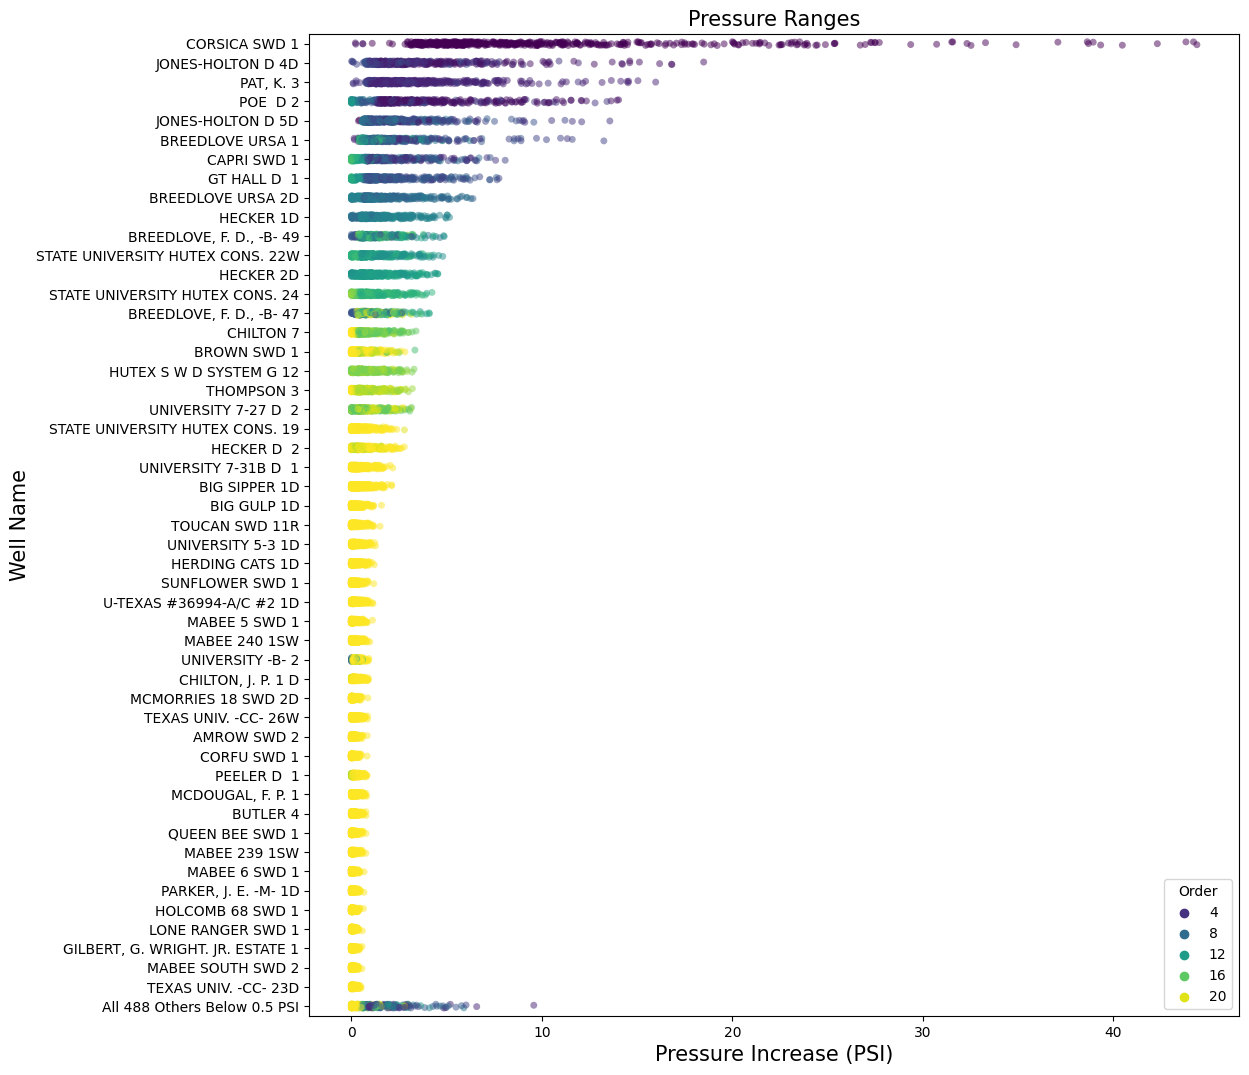

In [0]:
gp.disaggregationPlotPP(smallDPPDF,smallDWellList,'Deep Pressure Ranges',verbose=2)

In [0]:
# Load disposal and time series

In [0]:
# Plot of stacked history of contributing wells and total pressures

# Plot of disposal from one well and ranges of pressures.